In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


##**Import needed libraries**##

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Get data from kaggle**


In [17]:
df=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


**Start with EDA(Explority Data Analysis)**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [19]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


**Draw graph to show correlation between target(salary and years experience)**

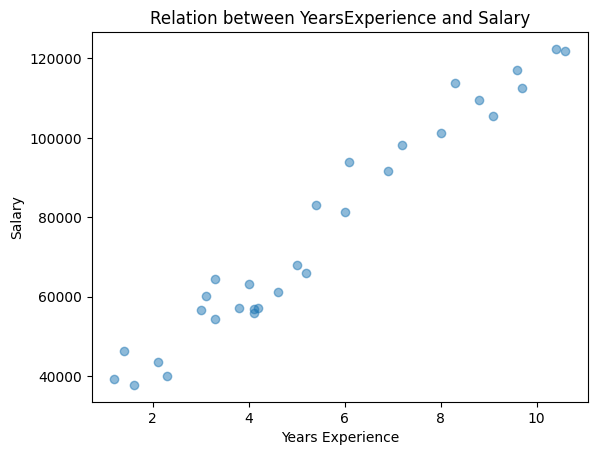

In [20]:
plt.scatter(x="YearsExperience",
           y="Salary",
           data=df,alpha=0.5)
plt.title("Relation between YearsExperience and Salary")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

**Bulding the model**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df.drop(columns=["Unnamed: 0"],inplace=True)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [22]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [23]:
pred=LR.predict(X_test)
pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

**Calculate the accuracy of the model**

In [25]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute error :",round(mean_absolute_error(y_test,pred),2))
#Compared to the salary mean absolute error is small value so model's accuracy is high

Mean absolute error : 5161.33


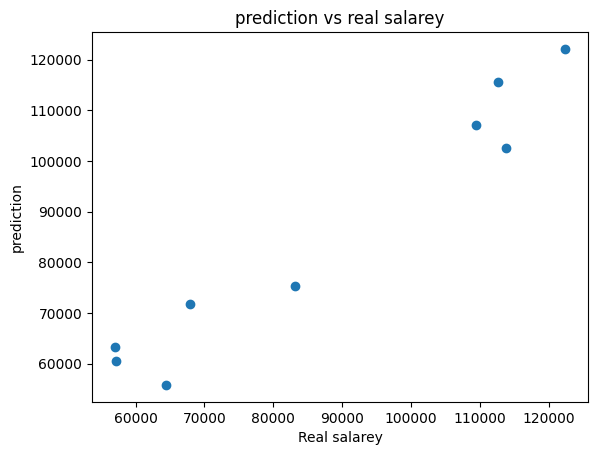

In [29]:

plt.scatter(y_test,pred)
plt.title("prediction vs real salarey")
plt.xlabel("Real salarey")
plt.ylabel("prediction")
plt.show()

**Find the model's coefficient**

In [33]:
cdf=pd.DataFrame(LR.coef_,X.columns,columns=["Coef"])
cdf
#This data frame shows how YearsExoprience affects the salarey 

,Coef
YearsExperience,9339.081724


**The End**